In [17]:
import xgboost as xgb
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import pandas as pd
import matplotlib.pyplot as plt




In [12]:
df = pd.read_csv("../data/dataset2cleaned.csv")

# Split features and target label
X = df.drop(columns=['genre'])  # Features
y = df['genre']  # Target (genre label)

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split into training and testing sets
X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Initialize the model
xgb_model = xgb.XGBClassifier(random_state=42)

# Train the model
xgb_model.fit(X_train_xgb, y_train_xgb)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test_xgb)

# Evaluate model
print("XGBoost")
print("Accuracy:", accuracy_score(y_test_xgb, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test_xgb, y_pred_xgb))

XGBoost
Accuracy: 0.826

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94       216
           1       0.76      0.73      0.75       190
           2       0.83      0.86      0.85       192
           3       0.84      0.84      0.84       210
           4       0.73      0.74      0.74       192

    accuracy                           0.83      1000
   macro avg       0.82      0.82      0.82      1000
weighted avg       0.83      0.83      0.83      1000



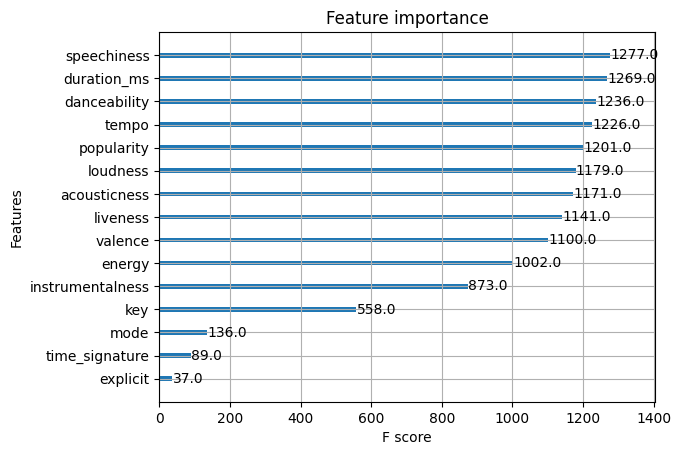

In [13]:
xgb.plot_importance(xgb_model)
plt.show()

In [16]:
# Drop features with low importance
X = X.drop(['mode', 'time_signature', 'explicit'], axis=1)

# Split into training and testing sets
X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Initialize the model
xgb_model = xgb.XGBClassifier(random_state=42)

# Train the model
xgb_model.fit(X_train_xgb, y_train_xgb)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test_xgb)

# Evaluate model
print("XGBoost")
print("Accuracy:", accuracy_score(y_test_xgb, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test_xgb, y_pred_xgb))


XGBoost
Accuracy: 0.83

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94       216
           1       0.78      0.73      0.75       190
           2       0.85      0.84      0.85       192
           3       0.84      0.88      0.86       210
           4       0.73      0.74      0.73       192

    accuracy                           0.83      1000
   macro avg       0.83      0.83      0.83      1000
weighted avg       0.83      0.83      0.83      1000



In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'min_child_weight': [1, 3, 5]
}

grid_search = GridSearchCV(
    estimator=xgb.XGBClassifier(random_state=42),
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    verbose=2
)

grid_search.fit(X_train_xgb, y_train_xgb)
best_xgb_model = grid_search.best_estimator_

# Evaluate best model
y_pred_xgb = best_xgb_model.predict(X_test_xgb)
print("Tuned XGBoost Accuracy:", accuracy_score(y_test_xgb, y_pred_xgb))
